In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Alternatives'), 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-05-20 to 2019-07-05 - 12


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats

12


,len,mean,std,shrp,drawdown
Symbols,,,,,
VNQI,28,0.639983,1.040997,0.576659,1.201963
RWX,28,0.391291,0.982035,0.358041,1.438101
XLRE,28,0.563354,2.226184,0.235233,4.835459
REM,28,0.290853,1.304723,0.192509,3.645715
RWO,28,0.328881,1.565427,0.184741,3.132428
VNQ,28,0.431719,2.235251,0.175388,5.135487
REET,28,0.328747,1.672523,0.172831,3.361345
IYR,28,0.404385,2.218952,0.164358,4.963136
ICF,28,0.356912,2.227113,0.142440,4.991450


evicted REM 0.5323365300555439
evicted XLRE 0.5566041174213188
retry backlogs ['ICF', 'USRT', 'IYR', 'RWO', 'RWX', 'REET', 'RWR', 'SCHH', 'VNQ'] at 0.905 - 0.5766593794393816
evicted VNQ 0.5709693777249284
retry backlogs ['USRT', 'ICF', 'RWO', 'RWR', 'SCHH', 'REET', 'RWX', 'IYR'] at 0.91 - 0.5766593794393816
evicted IYR 0.5713199511388563
retry backlogs ['RWO', 'RWX', 'REET', 'USRT', 'RWR', 'SCHH', 'ICF'] at 0.915 - 0.5766593794393816
evicted ICF 0.5625081784945498
retry backlogs ['RWO', 'RWX', 'REET', 'RWR', 'USRT', 'SCHH'] at 0.92 - 0.5766593794393816
evicted USRT 0.5799335000256175
retry backlogs ['RWO', 'RWX', 'REET', 'RWR', 'SCHH'] at 0.925 - 0.5766593794393816
evicted SCHH 0.5847638192024078
retry backlogs ['RWO', 'RWX', 'REET', 'RWR'] at 0.93 - 0.5766593794393816
evicted RWR 0.5868007798184146
retry backlogs ['RWO', 'RWX', 'REET'] at 0.935 - 0.5766593794393816
evicted RWX 0.9314764885618805
evicted REET 0.7214774382769524
retry backlogs ['RWO'] at 0.9400000000000001 - 0.57665937

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
VNQI,28.0,0.639983,1.040997,-0.877046,-0.235906,0.645188,1.614544,2.348139,0.576659,1.201963
Portfolio,28.0,0.639983,1.040997,-0.877046,-0.235906,0.645188,1.614544,2.348139,0.576659,1.201963


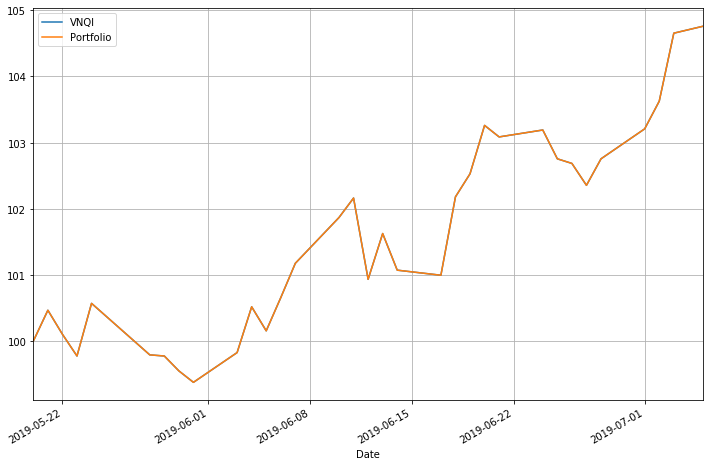

In [4]:
quote.setup_mask(stats.index)
ratio, shrp = quote.optimize_portfolio(.1)
print(ratio, shrp)
quote.setup_mask(ratio)
quote.graph(ratio)